# Recaman Sequence

<img src="recaman2.png",width=1000,height=60>
This notebook is inspired by on of the videos from Numberphile, a Youtube channel about Number Theory.


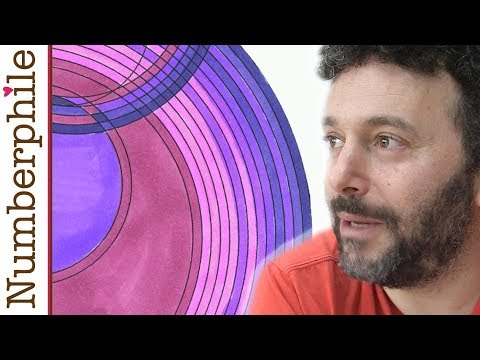

In [6]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('FGC5TdIiT9U')

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def recaman_sequence(N_steps=10, plot=False):
    if plot:
        fig, ax = plt.subplots(figsize=(20, 10))
        ax.set_aspect('equal')
        plt.title('Recaman Sequence, first %d elements' %N_steps)
    sequence = []
    sequence.append(0)
    step = 1
    for i in range(N_steps):
        current = sequence[i]
        # Check if you can go backwards
        prospect_back = current - step
        if prospect_back > 0:
            # Yes you can go back
            if prospect_back not in sequence:
                next_n = prospect_back
                sequence.append(prospect_back)
                step += 1
                
            # No you can't go back
            elif prospect_back in sequence:
                prospect_fwd = current + step
                next_n = prospect_fwd
                sequence.append(prospect_fwd)
                step += 1
        else:
            prospect_fwd = current + step
            next_n = prospect_fwd
            sequence.append(prospect_fwd)
            step += 1
            
        # Plot some cool stuff
        center = np.mean([current, next_n])
        
        if plot:
            radius = (step - 1) / 2
            theta = np.linspace(0, np.pi, 100, endpoint=True)
            x, y = radius * np.cos(theta), (-1)**(i+1) * radius * np.sin(theta)
            ax.plot(center+x, y, color='black')
    return sequence
                    

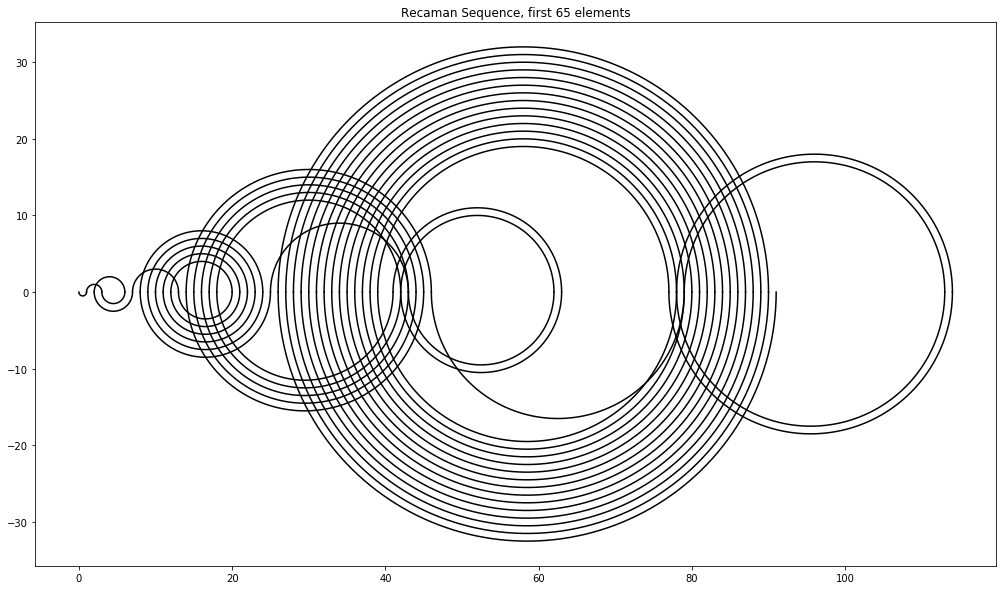

In [103]:
a = recaman_sequence(N_steps=65, plot=True)
plt.show()

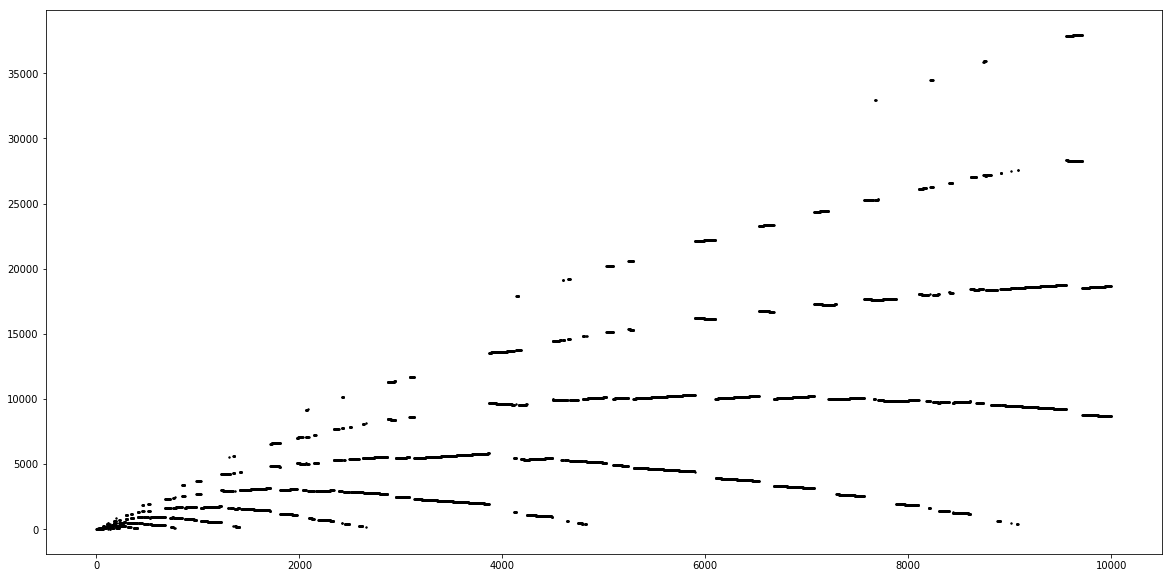

In [68]:
N = 10000
index = np.arange(N)
seq = recaman_sequence(N-1, plot=False)

fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(index, seq, color='black', s=2)
plt.show()


## Some statistics

Let's count the number of appearances of each value within the sequence

In [74]:
counts = np.zeros(N)
for k in range(N):
    counts[k] = seq.count(k)

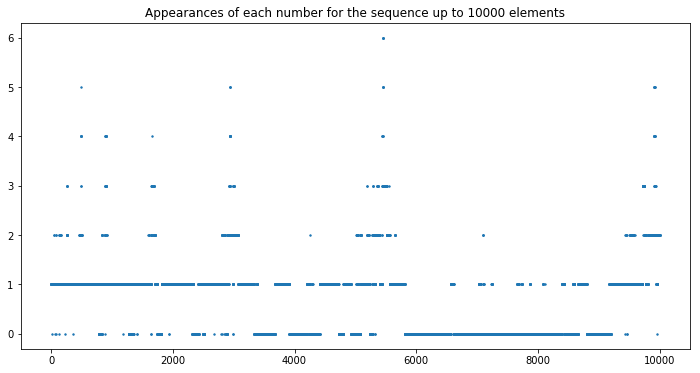

In [83]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(index, counts, s=2)
plt.title('Appearances of each number for the sequence up to %d elements' %N)
plt.show()

As we progress throught the natural numbers, does the fraction of remaining uncounted numbers in the sequence grow?
It looks pretty stable, so as we increase the range of the sequence, we do not seem to make a lot of progress on covering the remaining numbers

In [101]:
frac_remain = []
frac_counted_once = []
frac_counted_more = []

limits = np.array([100, 200, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 5000, 7500, 10000])
for max_term in limits:
    index = np.arange(max_term)
    seq = recaman_sequence(max_term-1, plot=False)
    counts = np.zeros(max_term, dtype=int)
    for k in range(max_term):
        counts[k] = seq.count(k)
    counts = np.ndarray.tolist(counts)
    not_counted = counts.count(0)
    once = counts.count(1)
    frac_remain.append(not_counted / max_term)
    frac_counted_once.append(once / max_term)
    frac_counted_more.append((max_term - not_counted - once) / max_term)


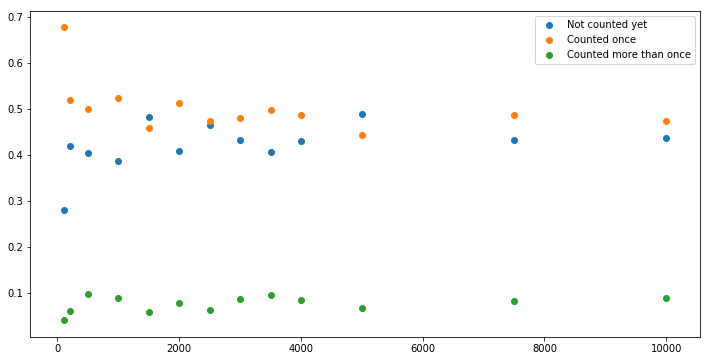

In [102]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(limits, frac_remain, label='Not counted yet')
plt.scatter(limits, frac_counted_once, label='Counted once')
plt.scatter(limits, frac_counted_more, label='Counted more than once')
plt.legend()
plt.show()